In [170]:
# pip install windrose

Note: you may need to restart the kernel to use updated packages.


In [1]:
# get the lats and lons, id's of current meter instruments 
# export some stats for eval of currents (not all tidal related stats though)
# extracted by pyap from 'class 4' data output from analyze.py

# created by G Oldford Aug 2023

import pickle
import os
import csv

cm_p = 'D:/temp_nemo/RUN216/PROCESS/'
cm_f = 'CM_class4_SalishSea1500-RUN216_depth-below-surface.pickle'

out_p = '../data/evaluation/'
out_f = 'cm_locations.csv'

cm_class4 = pickle.load(open(os.path.join(cm_p,cm_f), 'rb'))



for meter in cm_class4.keys():
    print(meter)
    for depth in cm_class4[meter].keys():
        lon = cm_class4[meter][depth]['total']['location'][0]
        lat = cm_class4[meter][depth]['total']['location'][1]
        print(lon)
        print(lat)
        
        # Now we'll write these values to a CSV file
        with open(os.path.join(out_p, out_f), mode='a', newline='') as csv_file:
            fieldnames = ['meter', 'lat', 'lon']  # Column headings
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

            # Check if the file is empty and write the headers if needed
            if csv_file.tell() == 0:
                writer.writeheader()

            # Write the values for the current iteration
            writer.writerow({'meter': meter, 'lat': lat, 'lon': lon})

AS04_CM_20160101-0037_20160415-1552_111m_noNaN
-123.390915
48.30095
AS04_CM_20161027-2237_20170419-2007_111m_noNaN
-123.390915
48.30095
AS04_CM_20171101-2237_20180327-1607_111m_noNaN
-123.390915
48.30095
AS04_CM_20180327-1822_20181029-1607_111m_noNaN
-123.390915
48.30095
AS04_CM_20181029-1737_20190529-1622_111m_noNaN
-123.390915
48.30095
BDYPM_CM_20160101-0037_20160414-1637_220m_noNaN
-123.03878
48.76642
BDYPM_CM_20160414-1822_20161021-2352_220m_noNaN
-123.03878
48.76642
BDYPM_CM_20170418-1952_20171102-2307_220m_noNaN
-123.03878
48.76642
BDYPM_CM_20171103-0137_20171128-2207_220m_noNaN
-123.03878
48.76642
BDYPM_CM_20171203-1922_20180326-1737_220m_noNaN
-123.03878
48.76642
BDYPM_CM_20181026-1852_20190519-1107_220m_noNaN
-123.03878
48.76642
JF2C_CM_20160510-2322_20170606-2352_182m_noNaN
-124.21578
48.355976
JF2C_CM_20170615-1707_20180702-0107_182m_noNaN
-124.21578
48.355976
JF2C_CM_20180804-0407_20190509-1407_182m_noNaN
-124.21578
48.355976
MAC_CM_20160101-0037_20160415-1807_55m_noNaN
-12

In [3]:
cm_class4[meter][1.600000023841858]['residual']

{'obs': {'time': array([datetime.datetime(2018, 9, 16, 8, 30),
         datetime.datetime(2018, 9, 16, 9, 30),
         datetime.datetime(2018, 9, 16, 10, 30), ...,
         datetime.datetime(2018, 11, 1, 17, 30),
         datetime.datetime(2018, 11, 1, 18, 30),
         datetime.datetime(2018, 11, 1, 19, 30)], dtype=object),
  'u': array([ 0.09148895,  0.13306132,  0.1657307 , ..., -0.19882002,
         -0.41562977, -0.32243206]),
  'v': array([-0.18333972, -0.1775879 , -0.08707759, ..., -0.2679937 ,
         -0.44493934, -0.34465986]),
  'speed': array([0.2048992 , 0.22190714, 0.18721424, ..., 0.33369151, 0.60886708,
         0.471967  ]),
  'dirn': array([153.48019531, 143.15687165, 117.71816401, ..., 216.57109775,
         223.04935381, 223.09158519])},
 'mod': {'time': array([datetime.datetime(2018, 9, 16, 9, 0),
         datetime.datetime(2018, 9, 16, 10, 0),
         datetime.datetime(2018, 9, 16, 11, 0), ...,
         datetime.datetime(2018, 11, 1, 17, 0),
         datetime.dat

In [2]:
cm_class4[meter][111.0]['residual']['scores']['vector_correlation']

KeyError: 111.0

In [5]:
meter = 'AS04_CM_20180327-1822_20181029-1607_111m_noNaN'
cm_class4[meter].keys()

dict_keys([111.0])

In [8]:
out_p = '../data/evaluation/'
out_f = 'cm_pyap_stats.csv'

print("note this does not export all stats related to tides")

with open(os.path.join(out_p, out_f), 'w', newline='') as csvfile:
    fieldnames = ['Meter', 'Depth', 'Type', 
                  'Date Start', 'Date End',
                  'Latitude', 'Longitude',
                  'CCE', 'CCE Mag.', 'CCE Deg.', 
                  'Mean Mag. Obs. (m/s)', 'Mean Dir. Obs. (deg.)', 
                  'Mean Mag. Mod. (m/s)', 'Mean Dir. Mod. (deg.)',
                  'Simple Bias (m/s)', 'Complex Bias', 'RMSE', 'CRMSE'
                 ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    for meter in cm_class4.keys():
        print(meter.split('_', 1)[0])
        for depth in cm_class4[meter].keys():
            print("depth: ", round(depth,2))
            
            # total 
            if not cm_class4[meter][depth]['total'] is None:
                date_start = cm_class4[meter][depth]['total']['obs']['time'][0].strftime('%Y-%m-%d')
                date_end = cm_class4[meter][depth]['total']['obs']['time'][-1].strftime('%Y-%m-%d')
                
                lon = cm_class4[meter][depth]['total']['location'][0]
                lat = cm_class4[meter][depth]['total']['location'][1]
                
                cce = cm_class4[meter][depth]['total']['scores']['vector_correlation']
                cce_mag = cm_class4[meter][depth]['total']['scores']['vector_correlation_magnitude']
                cce_deg = cm_class4[meter][depth]['total']['scores']['vector_correlation_degrees']

                mean_spd_tot_obs = cm_class4[meter][depth]['total']['means']['obs_sd']['full'][0]
                mean_spd_tot_mod = cm_class4[meter][depth]['total']['means']['mod_sd']['full'][0]
                mean_dir_tot_obs = cm_class4[meter][depth]['total']['means']['obs_sd']['full'][1]
                mean_dir_tot_mod = cm_class4[meter][depth]['total']['means']['mod_sd']['full'][1]
                
                bias = cm_class4[meter][depth]['total']['scores']['bias']
                rmse = cm_class4[meter][depth]['total']['scores']['rmse']
                crmse = cm_class4[meter][depth]['total']['scores']['crmse']

                print("total: ", round(cce_mag,2))
            else:
                print("error getting stats (total)")
                cce = cce_mag = cce_deg = -999.0
                mean_spd_tot_obs = mean_spd_tot_mod = mean_dir_tot_obs = mean_dir_tot_mod = -999.0
                bias = crmse = rmse = -999.0
                lon = lat = -999.0
                date_start = date_end = -999.0
                
            writer.writerow({
                    'Meter': meter.split('_', 1)[0],
                    'Depth': round(depth, 2),
                    'Type': 'Total',
                    'Date Start': date_start,
                    'Date End': date_end,
                    'Longitude': lon,
                    'Latitude': lat,
                    'CCE': round(cce, 2),
                    'CCE Mag.': round(cce_mag, 2),
                    'CCE Deg.': round(cce_deg, 2),
                    'Mean Mag. Obs. (m/s)': round(mean_spd_tot_obs,2),
                    'Mean Dir. Obs. (deg.)': round(mean_dir_tot_obs,2),
                    'Mean Mag. Mod. (m/s)': round(mean_spd_tot_mod,2),
                    'Mean Dir. Mod. (deg.)': round(mean_dir_tot_mod,2),
                    'Simple Bias (m/s)': round((mean_spd_tot_mod - mean_spd_tot_obs),2),
                    'Complex Bias': round(bias,2),
                    'RMSE': round(rmse,2),
                    'CRMSE': round(crmse,2)
                })
            
            # non tidal
            if not cm_class4[meter][depth]['residual'] is None:
                cce_nt = cm_class4[meter][depth]['residual']['scores']['vector_correlation']
                cce_mag_nt = cm_class4[meter][depth]['residual']['scores']['vector_correlation_magnitude']
                cce_deg_nt = cm_class4[meter][depth]['residual']['scores']['vector_correlation_degrees']

                mean_spd_nt_obs = cm_class4[meter][depth]['residual']['means']['obs_sd']['full'][0]
                mean_spd_nt_mod = cm_class4[meter][depth]['residual']['means']['mod_sd']['full'][0]
                mean_dir_nt_obs = cm_class4[meter][depth]['residual']['means']['obs_sd']['full'][1]
                mean_dir_nt_mod = cm_class4[meter][depth]['residual']['means']['mod_sd']['full'][1]
                
                bias_nt = cm_class4[meter][depth]['residual']['scores']['bias']
                rmse_nt = cm_class4[meter][depth]['residual']['scores']['rmse']
                crmse_nt = cm_class4[meter][depth]['residual']['scores']['crmse']

                print("non tidal: ", round(cce_mag_nt,2))
    #             print(cce_nt)
    #             print(round(cce_mag_nt,2))
    #             print(cce_deg_nt)
            else:
                print("error getting stats (residual)")
                cce_nt = cce_mag_nt = cce_deg_nt = -999.0
                mean_spd_nt_obs = mean_spd_nt_mod = mean_dir_tid_obs = mean_dir_tid_mod = -999.0
                bias_nt = rmse_nt = crmse_nt = -999.0

            writer.writerow({
                    'Meter': meter.split('_', 1)[0],
                    'Depth': round(depth, 2),
                    'Type': 'Non-Tidal',
                    'Date Start': date_start,
                    'Date End': date_end,
                    'Longitude': lon,
                    'Latitude': lat,
                    'CCE': round(cce_nt, 2),
                    'CCE Mag.': round(cce_mag_nt, 2),
                    'CCE Deg.': round(cce_deg_nt, 2),
                    'Mean Mag. Obs. (m/s)': round(mean_spd_nt_obs,2),
                    'Mean Dir. Obs. (deg.)': round(mean_dir_nt_obs,2),
                    'Mean Mag. Mod. (m/s)': round(mean_spd_nt_mod,2),
                    'Mean Dir. Mod. (deg.)': round(mean_dir_nt_mod,2),
                    'Simple Bias (m/s)': round((mean_spd_nt_mod-mean_spd_nt_obs),2),
                    'Complex Bias': round(bias_nt,2),
                    'RMSE': round(rmse_nt,2),
                    'CRMSE': round(crmse_nt,2)
                })
                
            # tidal
            if not cm_class4[meter][depth]['tidal'] is None:
                cce_t = cm_class4[meter][depth]['tidal']['scores']['vector_correlation']
                cce_mag_t = cm_class4[meter][depth]['tidal']['scores']['vector_correlation_magnitude']
                cce_deg_t = cm_class4[meter][depth]['tidal']['scores']['vector_correlation_degrees']

                # no means for tidal
#                 mean_spd_tid_obs = cm_class4[meter][depth]['tidal']['means']['obs_sd']['full'][0]
#                 mean_spd_tid_mod = cm_class4[meter][depth]['tidal']['means']['mod_sd']['full'][0]
#                 mean_dir_tid_obs = cm_class4[meter][depth]['tidal']['means']['obs_sd']['full'][1]
#                 mean_dir_tid_mod = cm_class4[meter][depth]['tidal']['means']['mod_sd']['full'][1]        

                print("tidal: ", round(cce_mag_t,2))
    #             print(cce_nt)
    #             print(round(cce_mag_nt,2))
    #             print(cce_deg_nt)
            else:
                print("error getting stats (tidal)")
                cce_t = cce_mag_t = cce_deg_t = -999.0
                mean_spd_tid_obs = mean_spd_tid_mod = mean_dir_tid_obs = mean_dir_tid_mod = -999.0

            writer.writerow({
                    'Meter': meter.split('_', 1)[0],
                    'Depth': round(depth, 2),
                    'Type': 'Tidal',
                    'Date Start': date_start,
                    'Date End': date_end,
                    'Longitude': lon,
                    'Latitude': lat,
                    'CCE': round(cce_t, 2),
                    'CCE Mag.': round(cce_mag_t, 2),
                    'CCE Deg.': round(cce_deg_t, 2),
                    'Mean Mag. Obs. (m/s)': -999.0,
                    'Mean Dir. Obs. (deg.)': -999.0,
                    'Mean Mag. Mod. (m/s)': -999.0,
                    'Mean Dir. Mod. (deg.)': -999.0,
                    'Simple Bias (m/s)': -999.0,
                    'Complex Bias': -999.0,
                    'RMSE': -999.0,
                    'CRMSE': -999.0
                })
                
            

        print("")

note this does not export all stats related to tides
AS04
depth:  111.0
total:  0.91
non tidal:  0.24
tidal:  0.96

AS04
depth:  111.0
total:  0.9
non tidal:  0.28
tidal:  0.95

AS04
depth:  111.0
total:  0.9
non tidal:  0.28
tidal:  0.95

AS04
depth:  111.0
total:  0.88
non tidal:  0.26
tidal:  0.93

AS04
depth:  111.0
total:  0.85
non tidal:  0.17
tidal:  0.9

BDYPM
depth:  220.0
total:  0.55
non tidal:  0.03
tidal:  0.69

BDYPM
depth:  220.0
total:  0.35
non tidal:  0.13
tidal:  0.49

BDYPM
depth:  220.0
total:  0.31
non tidal:  0.08
tidal:  0.44

BDYPM
depth:  220.0
total:  0.48
error getting stats (residual)
error getting stats (tidal)

BDYPM
depth:  220.0
total:  0.6
non tidal:  0.02
tidal:  0.73

BDYPM
depth:  220.0
total:  0.58
non tidal:  0.01
tidal:  0.72

JF2C
depth:  182.0
total:  0.72
non tidal:  0.13
tidal:  0.82

JF2C
depth:  182.0
total:  0.86
non tidal:  0.22
tidal:  0.91

JF2C
depth:  182.0
total:  0.94
non tidal:  0.2
tidal:  0.98

MAC
depth:  55.0
total:  0.74
non t

C:\Users\Greig\AppData\Local\Temp\ipykernel_2772\2355812966.py:62: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  'CCE': round(cce, 2),
C:\Users\Greig\AppData\Local\Temp\ipykernel_2772\2355812966.py:70: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  'Complex Bias': round(bias,2),
C:\Users\Greig\AppData\Local\Temp\ipykernel_2772\2355812966.py:108: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  'CCE': round(cce_nt, 2),
C:\Users\Greig\AppData\Local\Temp\ipykernel_2772\2355812966.py:116: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a futu

In [143]:
# scraps below

In [16]:
meter = 'AS04_CM_20160101-0037_20160415-1552_111m_noNaN'
depth = 111.0
cm_class4[meter][depth]['total']['obs'].keys()

dict_keys(['time', 'u', 'v', 'speed', 'dirn'])

In [139]:
cm_class4[meter][depth]['total']['obs']['time'][0].strftime('%Y-%m-%d')
# cm_class4[meter][depth]['total']['obs']['time'][-1]

'2018-09-16'

In [140]:
meter.split('_', 1)[0]

'NDBC46088'

In [15]:
cm_class4[meter][depth]['total']['scores'].keys()

KeyError: 1.600000023841858

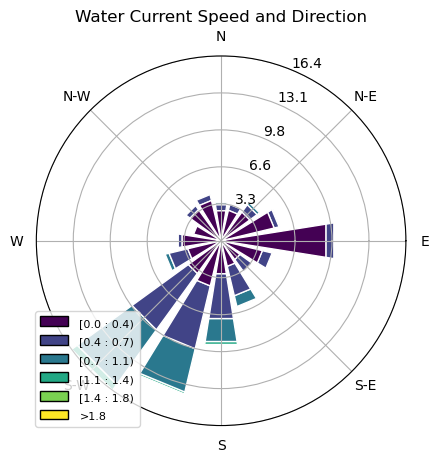

In [4]:
# simple windrose test

import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np

obs_data = cm_class4[meter][depth]['total']['obs']
speeds = obs_data['speed']
directions = obs_data['dirn']

# Create a wind rose plot
fig, ax = plt.subplots(subplot_kw={'projection': 'windrose'})



# Convert directions to radians
directions_rad = np.radians(directions)

# Plot the wind rose
# ax = WindroseAxes.from_ax()
ax.bar(directions, speeds, normed=True, opening=0.8, edgecolor='white')



# ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
ax.set_legend()

plt.title('Water Current Speed and Direction')
plt.show()

In [438]:
# possible stations. 
# 2023-08-29 - there are only six but 42 b/c truncation:
# len(cm_class4.keys())


In [5]:
# created var for residual, total, or tidal metrics - GO Feb 2024
resid_tid_tot = "residual"

# Create a dictionary to store combined data by station
combined_data_by_station = {}

# Create a dictionary to store combined data by station
combined_data_by_station = {}

# Loop over the data dictionary to combine data by station
for meter in cm_class4.keys():
    station = meter.split('_', 1)[0]
    
    # omit erroneous one
    if station == 'BDYPM':
        continue
    
    if station not in combined_data_by_station:
        combined_data_by_station[station] = {
            'speeds_obs': [],
            'speeds_mod': [],
            'directions_obs': [],
            'directions_mod': [],
            'time_obs':[],
            'time_mod':[],
            'depth':[],
            'lon':[],
            'lat':[]
        }
    
    for depth in cm_class4[meter].keys():
        obs_data = cm_class4[meter][depth][resid_tid_tot]['obs']
        mod_data = cm_class4[meter][depth][resid_tid_tot]['mod']
        
        combined_data_by_station[station]['speeds_obs'].extend(obs_data['speed'])
        combined_data_by_station[station]['speeds_mod'].extend(mod_data['speed'])
        combined_data_by_station[station]['directions_obs'].extend(obs_data['dirn'])
        combined_data_by_station[station]['directions_mod'].extend(mod_data['dirn'])
        combined_data_by_station[station]['time_obs'].extend(obs_data['time'])
        combined_data_by_station[station]['time_mod'].extend(mod_data['time'])
        combined_data_by_station[station]['depth'] = depth
        combined_data_by_station[station]['lon'] = float(cm_class4[meter][depth][resid_tid_tot]['location'][0])
        combined_data_by_station[station]['lat'] = float(cm_class4[meter][depth][resid_tid_tot]['location'][1])



dict_keys(['obs', 'mod', 'scores', 'location', 'means'])

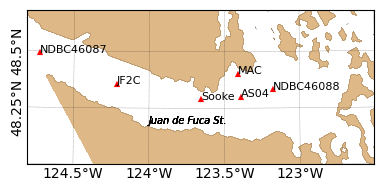

In [6]:
# map for reference - test

# pip install mpl_toolkits
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
# pip install mpl_toolkits
# pip install basemap
import xarray as xr
import os
import numpy as np
import pickle
import csv

grid_p = '../data/bathymetry/'
grid_f = 'bathy_salishsea_1500m_20210706.nc'
grid = xr.open_dataset(os.path.join(grid_p, grid_f), mask_and_scale=False)

def make_map(ax, grid, w_map=[-124, -123.9, 47.7, 50.6], rotation=39.2):
    """
    """

    # Make projection
    m = Basemap(ax=ax, projection='lcc', resolution='c',
                lon_0=(w_map[1] - w_map[0]) / 2 + w_map[0] + rotation,
                lat_0=(w_map[3] - w_map[2]) / 2 + w_map[2],
                llcrnrlon=w_map[0], urcrnrlon=w_map[1],
                llcrnrlat=w_map[2], urcrnrlat=w_map[3])

    # Add features and labels
    x, y = m(grid.nav_lon.values, grid.nav_lat.values)
    ax.contourf(x, y, grid.Bathymetry, [-0.01, 0.01], colors='burlywood')
    ax.contour(x, y, grid.Bathymetry, [-0.01, 0.01], colors='black', linewidths=0.1)
    m.drawmeridians(np.arange(-125.5, -122, 0.5), labels=[0, 0, 0, 1], linewidth=0.2)
    parallels = m.drawparallels(np.arange(48, 51, 0.25), labels=[1, 0, 0, 0], linewidth=0.2)
    for p in parallels:
        try:
            parallels[p][1][0].set_rotation(90)
        except:
            pass
    
    
    return m

fig, ax = plt.subplots(figsize=(8,2))
m = make_map(ax,grid, w_map=[-124.8, -122.5, 48, 48.68], rotation=0)

# Plot stations
station_keys = list(combined_data_by_station.keys())
for station in station_keys:
    lon = combined_data_by_station[station]['lon']
    lat = combined_data_by_station[station]['lat']
    x,y = m(lon,lat)
    ax.plot(x,y, 'k^', markersize=4, markerfacecolor='r', mec='r', mew=0.1, label=station)
    ax.text(x,y, station, fontsize=8)
    
    lat, lon = 48.18, -124
    x,y = m(lon,lat)
    ax.text(x,y,"Juan de Fuca St.", fontsize=7, fontstyle='italic')

In [16]:
combined_data_by_station['AS04'].keys()

dict_keys(['speeds_obs', 'speeds_mod', 'directions_obs', 'directions_mod', 'time_obs', 'time_mod', 'depth', 'lon', 'lat'])

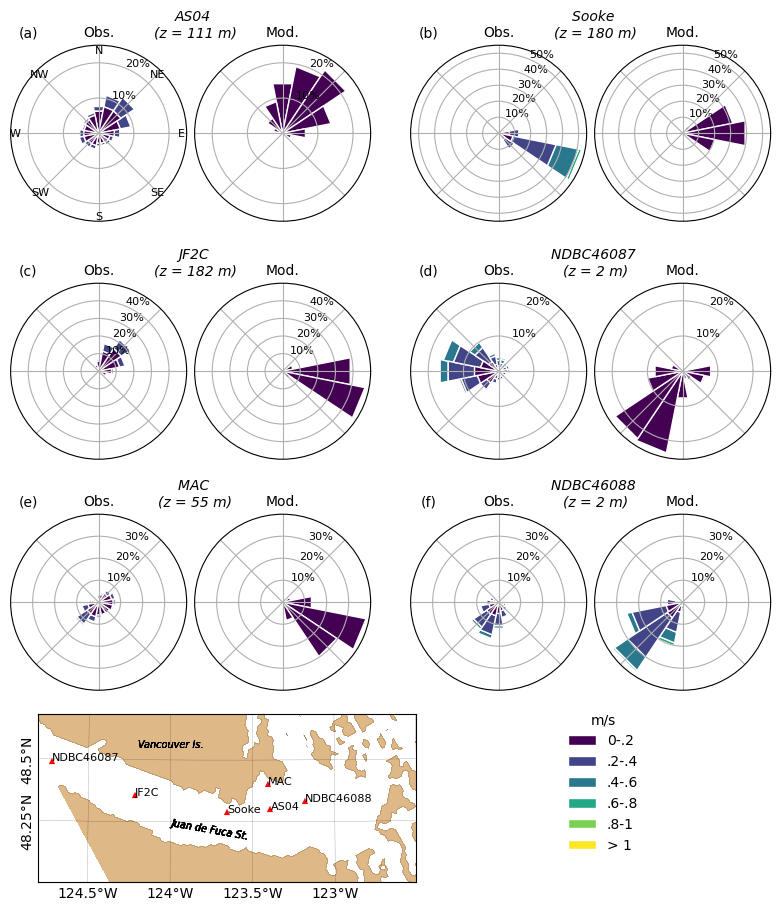

In [7]:
# plots with windroses

# credit Ben Moore-Maley (thank you) for some of this code

model = 'SS1500-RUN216' # not used
letters = ['(a)', '(c)', '(e)', '(b)', '(d)', '(f)',
           '(g)', '(h)', '(i)', '(j)', '(k)', '(l)'
          ]
station_keys = list(combined_data_by_station.keys())
bins =np.arange(0, 1.1, 0.2) 

# Make figure
fig = plt.figure(figsize=(8, 7)) # w,h

# Loop through stations and records
l = 0
for keys, xpos in zip([station_keys[0:3], station_keys[3:6]], [0, 0.5]):
    n = 0
    for station, ypos in zip(keys, [1.0,0.66, 0.33]):
        depth = combined_data_by_station[station]['depth']
        letter = letters[l]
        for record, xshift in zip(['obs', 'mod'], [0, 0.23]):

            # Make windrose object
            ax = WindroseAxes.from_ax(fig=fig)
            ax.set_position([xpos+xshift, ypos, 0.22, 0.3]) # left, bottom, width, height
            
            # Plot wind data
#             angle = 360 - combined_data_by_station[station][record]['wdir'] - 90
#             angle[angle < 0] = angle[angle < 0] + 360
            if record == 'obs':
                directions = combined_data_by_station[station]['directions_obs']
                speeds = combined_data_by_station[station]['speeds_obs']
            else:
                directions = combined_data_by_station[station]['directions_mod']
                speeds = combined_data_by_station[station]['speeds_mod']
                
            ax.bar(directions, speeds, normed=True, 
                   opening=1, edgecolor='white', bins=bins)
            
            # Manually get legend handles (since WindroseAxes.bar returns None)
            handles = ax.get_children()[:6]

            if record == 'mod':
                ax_mod = ax
                ax.xaxis.set_ticklabels('')
            else:
                ax_obs = ax
                ax.text(1.05, 1.05, station + ' \n(z = ' + str(round(depth)) + ' m)', transform=ax.transAxes, 
                        fontdict={'style': 'italic', 'ha':'center'})
                if station == 'AS04':
                    ax.xaxis.set_ticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
                    ax.tick_params(axis='x', which='both', labelsize=8, pad=-14)
                else:
                    ax.xaxis.set_ticklabels('')
        
        # format axis so obs and mod scale match
        _, ymax_obs = ax_obs.get_ylim()
        _, ymax_mod = ax_mod.get_ylim()
        ymax = max(ymax_obs, ymax_mod)
        
        next_increment = np.ceil(ymax * 1.0 / 5) * 5
        ax_obs.set_ylim([0, next_increment])
        ax_mod.set_ylim([0, next_increment])
        
        # set tick increment
        incr = 5
        if next_increment > 24:
            incr = 10
        ticks_g = np.arange(incr,next_increment,incr)
        ax_obs.yaxis.set_ticks(ticks_g)
        ax_mod.yaxis.set_ticks(ticks_g)
        ax_obs.yaxis.set_ticklabels(ticklabels=[f'{tick:.0f}%' for tick in ticks_g], fontsize=8)
        ax_mod.yaxis.set_ticklabels(ticklabels=[f'{tick:.0f}%' for tick in ticks_g], fontsize=8)
        
#         if n == 0: 
#             ax_obs.text(0.5, 1.12, 'Obs.', transform=ax_obs.transAxes, ha='center', fontdict={'weight': 'bold'})
#             ax_mod.text(0.5, 1.12, 'Mod.', transform=ax_mod.transAxes, ha='center', fontdict={'weight': 'bold'})
      
        ax_obs.text(0.5, 1.05, 'Obs.', transform=ax_obs.transAxes, ha='center') #fontdict={'weight': 'bold'})
        ax_mod.text(0.5, 1.05, 'Mod.', transform=ax_mod.transAxes, ha='center') #fontdict={'weight': 'bold'})
        
        # letter labels
        ax_obs.text(0.1, 1.05, letter, transform=ax_obs.transAxes, ha='center') #fontdict={'weight': 'bold'})
        
        n += 1 #increment y pos
        l += 1 # index for letter labels

# Add legend
labels = ['0-.2', '.2-.4', '.4-.6', '.6-.8', '.8-1', '> 1']
# wide option
# fig.legend(frameon=False, handles=handles, labels=labels, bbox_to_anchor=(0.8, 0.36), ncol=6, title='m/s')
fig.legend(frameon=False, handles=handles, labels=labels, bbox_to_anchor=(0.8, 0.34), ncol=1, title='m/s')

# plt.subplots_adjust(bottom=0.1)
# plt.tight_layout()

ax_map = fig.add_subplot()
ax_map.set_position([-0.18, 0.08, 0.9, 0.24]) # # left, bottom, width, height

m = make_map(ax_map, grid, w_map=[-124.8, -122.5, 48, 48.68], rotation=0)

# Plot stations
station_keys = list(combined_data_by_station.keys())
for station in station_keys:
    
    lon = combined_data_by_station[station]['lon']
    lat = combined_data_by_station[station]['lat']
    
    x,y = m(lon,lat)
    ax_map.plot(x,y, 'k^', markersize=4, markerfacecolor='r', mec='r', mew=0.1, label=station)
    ax_map.text(x,y, station, fontsize=8)
    
    lat, lon = 48.18, -124
    x,y = m(lon,lat)
    ax_map.text(x,y,"Juan de Fuca St.", fontsize=7, fontstyle='italic', fontstretch=10, rotation=-10)
    
    lat, lon = 48.55, -124.2
    x,y = m(lon,lat)
    ax_map.text(x,y,"Vancouver Is.", fontsize=7, fontstyle='italic', fontstretch=10)

plt.show()



In [71]:
cmbn_d_onlythree.keys()


dict_keys(['NDBC46088', 'AS04', 'JF2C'])


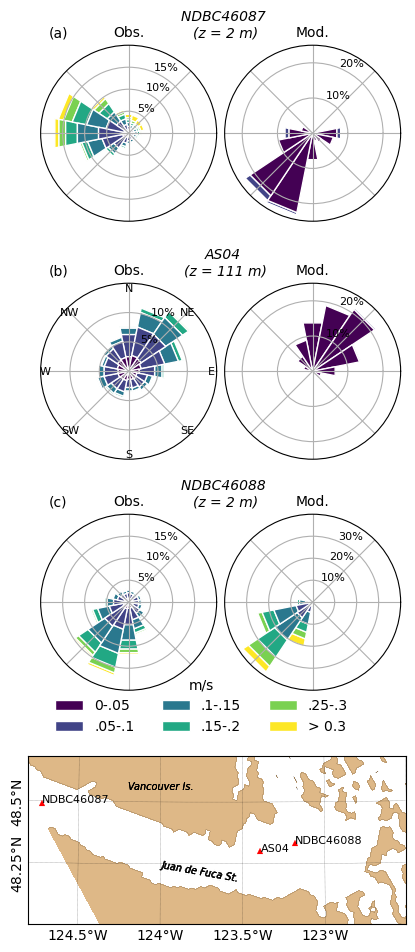

In [10]:
# reduce stations to just three for space reasons
# credit Ben Moore-Maley (thank you) for some of this code

model = 'SS1500-RUN216' # not used
letters = ['(a)', '(b)', '(c)', '(b)', '(d)', '(f)',
           '(g)', '(h)', '(i)', '(j)', '(k)', '(l)'
          ]
station_keys = list(combined_data_by_station.keys())

cmbn_d_onlythree = combined_data_by_station
cmbn_d_onlythree.pop('MAC', None)
cmbn_d_onlythree.pop('Sooke', None)
cmbn_d_onlythree.pop('JF2C', None)
desired_order = ['NDBC46087', 'AS04', 'NDBC46088']
reordered_dict = {key: cmbn_d_onlythree[key] for key in desired_order}
cmbn_d_onlythree = reordered_dict

station_keys = list(cmbn_d_onlythree.keys())

bins =np.arange(0, 0.6, 0.1) 

# Make figure
fig = plt.figure(figsize=(8, 7)) # w,h

# Loop through stations and records
l = 0
for keys, xpos in zip([station_keys[0:3], station_keys[3:6]], [0.05, 0.5]):
    n = 0
    for station, ypos in zip(keys, [1.0,0.66, 0.33]):
        depth = combined_data_by_station[station]['depth']
        letter = letters[l]
        for record, xshift in zip(['obs', 'mod'], [0, 0.23]):

            # Make windrose object
            ax = WindroseAxes.from_ax(fig=fig)
            ax.set_position([xpos+xshift, ypos, 0.22, 0.3]) # left, bottom, width, height
            
            # Plot wind data
#             angle = 360 - combined_data_by_station[station][record]['wdir'] - 90
#             angle[angle < 0] = angle[angle < 0] + 360
            if record == 'obs':
                directions = combined_data_by_station[station]['directions_obs']
                speeds = combined_data_by_station[station]['speeds_obs']
            else:
                directions = combined_data_by_station[station]['directions_mod']
                speeds = combined_data_by_station[station]['speeds_mod']
                
            ax.bar(directions, speeds, normed=True, 
                   opening=1, edgecolor='white', bins=bins)
            
            # Manually get legend handles (since WindroseAxes.bar returns None)
            handles = ax.get_children()[:6]

            if record == 'mod':
                ax_mod = ax
                ax.xaxis.set_ticklabels('')
            else:
                ax_obs = ax
                ax.text(1.05, 1.05, station + ' \n(z = ' + str(round(depth)) + ' m)', transform=ax.transAxes, 
                        fontdict={'style': 'italic', 'ha':'center'})
                if station == 'AS04':
                    ax.xaxis.set_ticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
                    ax.tick_params(axis='x', which='both', labelsize=8, pad=-14)
                else:
                    ax.xaxis.set_ticklabels('')
        
        # format axis so obs and mod scale match
        # to have them match, uncomment this and comment out the code below
#         _, ymax_obs = ax_obs.get_ylim()
#         _, ymax_mod = ax_mod.get_ylim()
#         ymax = max(ymax_obs, ymax_mod)
        
#         next_increment = np.ceil(ymax * 1.0 / 5) * 5
#         ax_obs.set_ylim([0, next_increment])
#         ax_mod.set_ylim([0, next_increment])
        
#         # set tick increment
#         incr = 5
#         if next_increment > 24:
#             incr = 10
#         ticks_g = np.arange(incr,next_increment,incr)
#         ax_obs.yaxis.set_ticks(ticks_g)
#         ax_mod.yaxis.set_ticks(ticks_g)
#         ax_obs.yaxis.set_ticklabels(ticklabels=[f'{tick:.0f}%' for tick in ticks_g], fontsize=8)
#         ax_mod.yaxis.set_ticklabels(ticklabels=[f'{tick:.0f}%' for tick in ticks_g], fontsize=8)
        
        # this allows the scales to differ between plots
        _, ymax_obs = ax_obs.get_ylim()
        _, ymax_mod = ax_mod.get_ylim()
        
        next_increment_obs = np.ceil(ymax_obs * 1.0 / 5) * 5
        next_increment_mod = np.ceil(ymax_mod * 1.0 / 5) * 5
        ax_obs.set_ylim([0, next_increment_obs])
        ax_mod.set_ylim([0, next_increment_mod])
        
        # set tick increment
        incr = 5
        if next_increment_obs > 24:
            incr = 10
        ticks_g_obs = np.arange(incr,next_increment_obs,incr)
        ax_obs.yaxis.set_ticks(ticks_g_obs)
        ax_obs.yaxis.set_ticklabels(ticklabels=[f'{tick:.0f}%' for tick in ticks_g_obs], fontsize=8)
        
        incr = 5
        if next_increment_mod > 24:
            incr = 10
        ticks_g_mod = np.arange(incr,next_increment_mod,incr)
        ax_mod.yaxis.set_ticks(ticks_g_mod)
        ax_mod.yaxis.set_ticklabels(ticklabels=[f'{tick:.0f}%' for tick in ticks_g_mod], fontsize=8)
        
        
#         if n == 0: 
#             ax_obs.text(0.5, 1.12, 'Obs.', transform=ax_obs.transAxes, ha='center', fontdict={'weight': 'bold'})
#             ax_mod.text(0.5, 1.12, 'Mod.', transform=ax_mod.transAxes, ha='center', fontdict={'weight': 'bold'})
      
        ax_obs.text(0.5, 1.05, 'Obs.', transform=ax_obs.transAxes, ha='center') #fontdict={'weight': 'bold'})
        ax_mod.text(0.5, 1.05, 'Mod.', transform=ax_mod.transAxes, ha='center') #fontdict={'weight': 'bold'})
        
        # letter labels
        ax_obs.text(0.1, 1.05, letter, transform=ax_obs.transAxes, ha='center') #fontdict={'weight': 'bold'})
        
        n += 1 #increment y pos
        l += 1 # index for letter labels

# Add legend
labels = ['0-.05', '.05-.1', '.1-.15', '.15-.2', '.25-.3', '> 0.3']
# wide option
# fig.legend(frameon=False, handles=handles, labels=labels, bbox_to_anchor=(0.8, 0.36), ncol=6, title='m/s')
fig.legend(frameon=False, handles=handles, labels=labels, 
           bbox_to_anchor=(0.45, 0.39), ncol=3, title='m/s')

# plt.subplots_adjust(bottom=0.1)
# plt.tight_layout()

ax_map = fig.add_subplot()
ax_map.set_position([-0.18, 0.02, 0.9, 0.24]) # # left, bottom, width, height

m = make_map(ax_map, grid, w_map=[-124.8, -122.5, 48, 48.68], rotation=0)

# Plot stations
station_keys = list(combined_data_by_station.keys())
for station in station_keys:
    
    lon = combined_data_by_station[station]['lon']
    lat = combined_data_by_station[station]['lat']
    
    x,y = m(lon,lat)
    ax_map.plot(x,y, 'k^', markersize=4, markerfacecolor='r', mec='r', mew=0.1, label=station)
    ax_map.text(x,y, station, fontsize=8)
    
    lat, lon = 48.18, -124
    x,y = m(lon,lat)
    ax_map.text(x,y,"Juan de Fuca St.", fontsize=7, fontstyle='italic', fontstretch=10, rotation=-10)
    
    lat, lon = 48.55, -124.2
    x,y = m(lon,lat)
    ax_map.text(x,y,"Vancouver Is.", fontsize=7, fontstyle='italic', fontstretch=10)

plt.show()

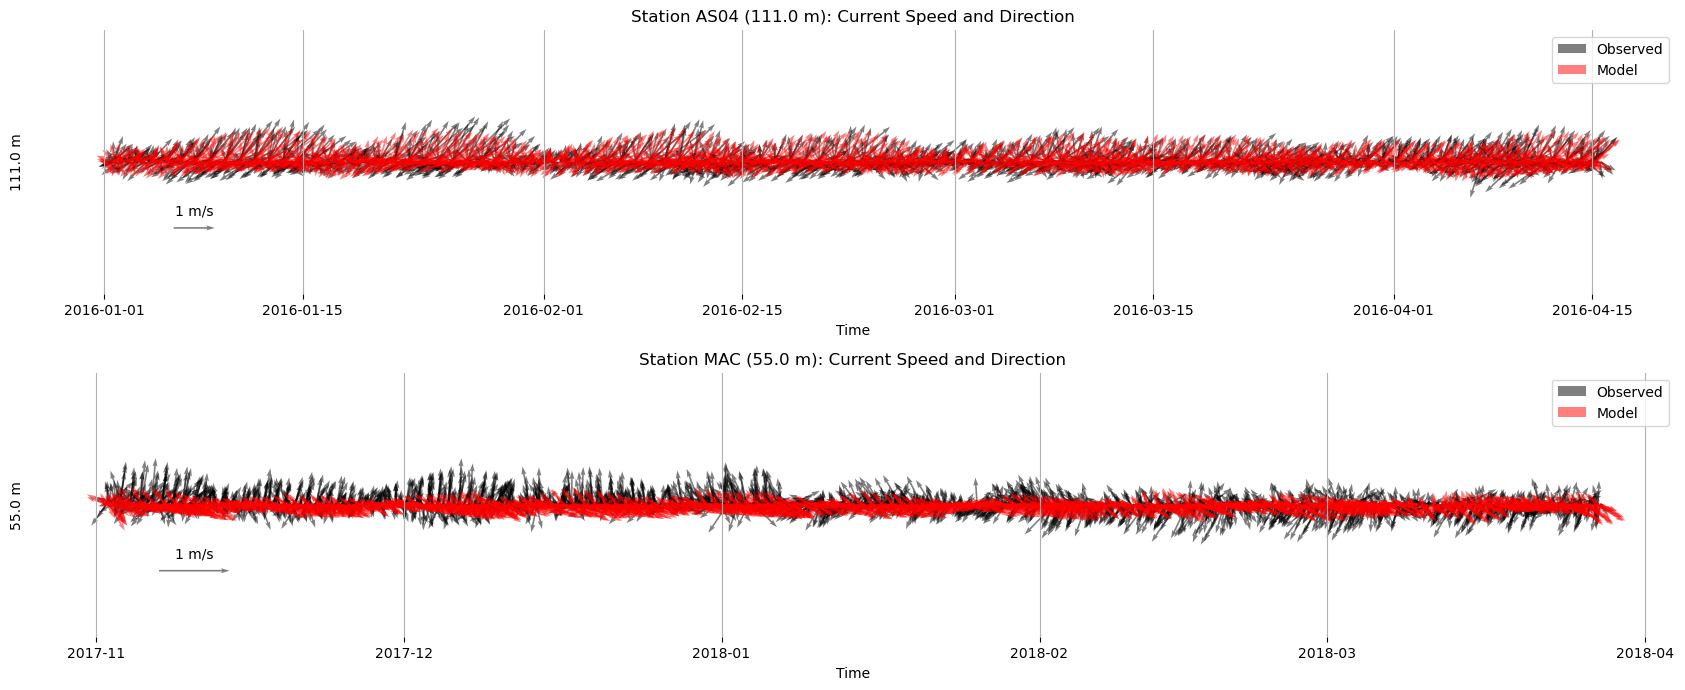

In [439]:
# didn't use quiver, but code below
from matplotlib.dates import date2num
import pandas as pd

# plot quivers with coarsening option
def plot_quivers(ax, meter, depth, obs_df, mod_df):
    q = ax.quiver(
        obs_df.index,   # x-coordinates (datetime converted)
        np.zeros_like(obs_df['u']), # y-coordinates (set to zero for overlay)
        obs_df['u'],         # u (x-component of speed)
        obs_df['v'],         # v (y-component of speed)
        color='k', label='Observed', width=0.001, alpha=0.5
    )

    ax.quiver(
        coarse_mod_df.index,   # x-coordinates (datetime converted)
        np.zeros_like(mod_df['u']), # y-coordinates (set to zero for overlay)
        mod_df['u'],         # u (x-component of speed)
        mod_df['v'],         # v (y-component of speed)
        color='red', label='Model', width=0.001, alpha=0.5
    )

    ax.set_xlabel('Time')
    ax.set_ylabel(str(depth) + ' m')
    # ax.set_axis_off()
    ax.set_ylim(-0.5,0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_tick_params(which='both', size=0)
    ax.yaxis.set_ticklabels([])
    ax.xaxis.grid(True)

    qk = ax.quiverkey(q, 0.1, 0.25, 1, '1 m/s',fontproperties={'size':10}, linewidth=1)
    ax.legend()
    ax.set_title('Station ' + meter.split('_', 1)[0] + ' (' + str(depth) + ' m): Current Speed and Direction')
    

# for plotting, resample 
resample_scale = '1H'
meters = ['AS04_CM_20160101-0037_20160415-1552_111m_noNaN',
          'MAC_CM_20171101-2022_20180327-1907_55m_noNaN']
# Sooke_CM_2018-10_2018-11_180m
# NDBC46088_CM_20160101_20160701_1m

# setup plot
fig = plt.figure(figsize=(17, 10))
gs = gridspec.GridSpec(3, 4, height_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[row, :]) for row in np.arange(0,len(meters))]

row = 0
for meter in cm_class4.keys():

    if not meter in meters:
        continue
    
    # assuming one depth only
    for depth in cm_class4[meter].keys():
    
        obs_data = cm_class4[meter][depth]['total']['obs']
        mod_data = cm_class4[meter][depth]['total']['mod'] 

        # obs_speeds = obs_data['speed']
        obs_u = obs_data['u']
        obs_v = obs_data['v']
        obs_directions = obs_data['dirn']
        obs_x_values = date2num(obs_data['time'])

        # mod_speeds = mod_data['speed']
        mod_u = mod_data['u']
        mod_v = mod_data['v']
        mod_directions = mod_data['dirn']
        mod_x_values = date2num(mod_data['time'])

        # obs_directions_rad = np.radians(obs_directions)
        # mod_directions_rad = np.radians(mod_directions)

        min_y = min(np.min(obs_v), np.min(mod_v))
        max_y = max(np.max(obs_v), np.max(mod_v))

        # for coarsening plot
        # Combine datetime and 'u'/'v' data for 'obs' and 'mod'
        obs_df = pd.DataFrame({'datetime': obs_data['time'], 'u': obs_u, 'v': obs_v})
        mod_df = pd.DataFrame({'datetime': mod_data['time'], 'u': mod_u, 'v': mod_v})

        # Coarsen the data by resampling over larger time intervals (e.g., 1-hour intervals)
        coarse_obs_df = obs_df.resample(resample_scale, on='datetime').mean()
        coarse_mod_df = mod_df.resample(resample_scale, on='datetime').mean()

        ax = axs[row]
        plot_quivers(ax, meter, round(depth,1), coarse_obs_df, coarse_mod_df)
        row+=1




plt.tight_layout()  
plt.show()